# Project-Based Tutorial: EDA, Cleaning, and Preprocessing on the Hotel Bookings Dataset


**Phases:**
- Phase 1: EDA & Data Quality Report
- Phase 2: Data Cleaning
- Phase 3: Feature Engineering & Preprocessing



In [44]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

# Set visualization style
sns.set(style="whitegrid")

## Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

Load the data and generate summary statistics.

In [45]:
# reading data
df = pd.read_csv("/content/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [47]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#Data Exploration

In [48]:
null_values = df.isna().sum().sort_values(ascending=False).head(6)
null_values

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0


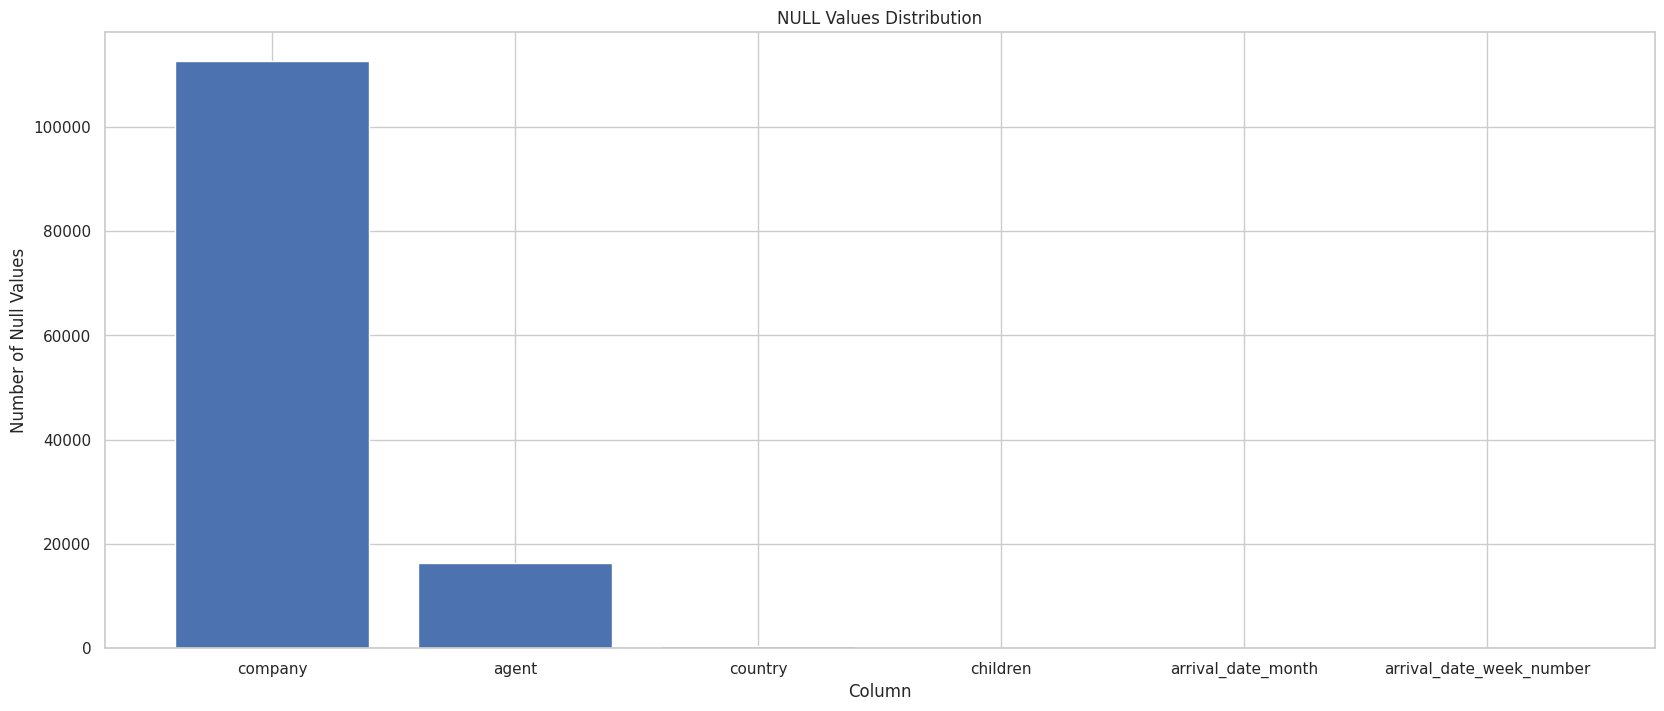

In [49]:
plt.figure(figsize=(20, 8))
plt.bar(x = null_values.index, height=null_values.values)
plt.title("NULL Values Distribution")
plt.xlabel("Column")
plt.ylabel("Number of Null Values")
plt.show()

company column has **20108** Null values out of 21950 entry. Company Column should be dropped.

<Axes: >

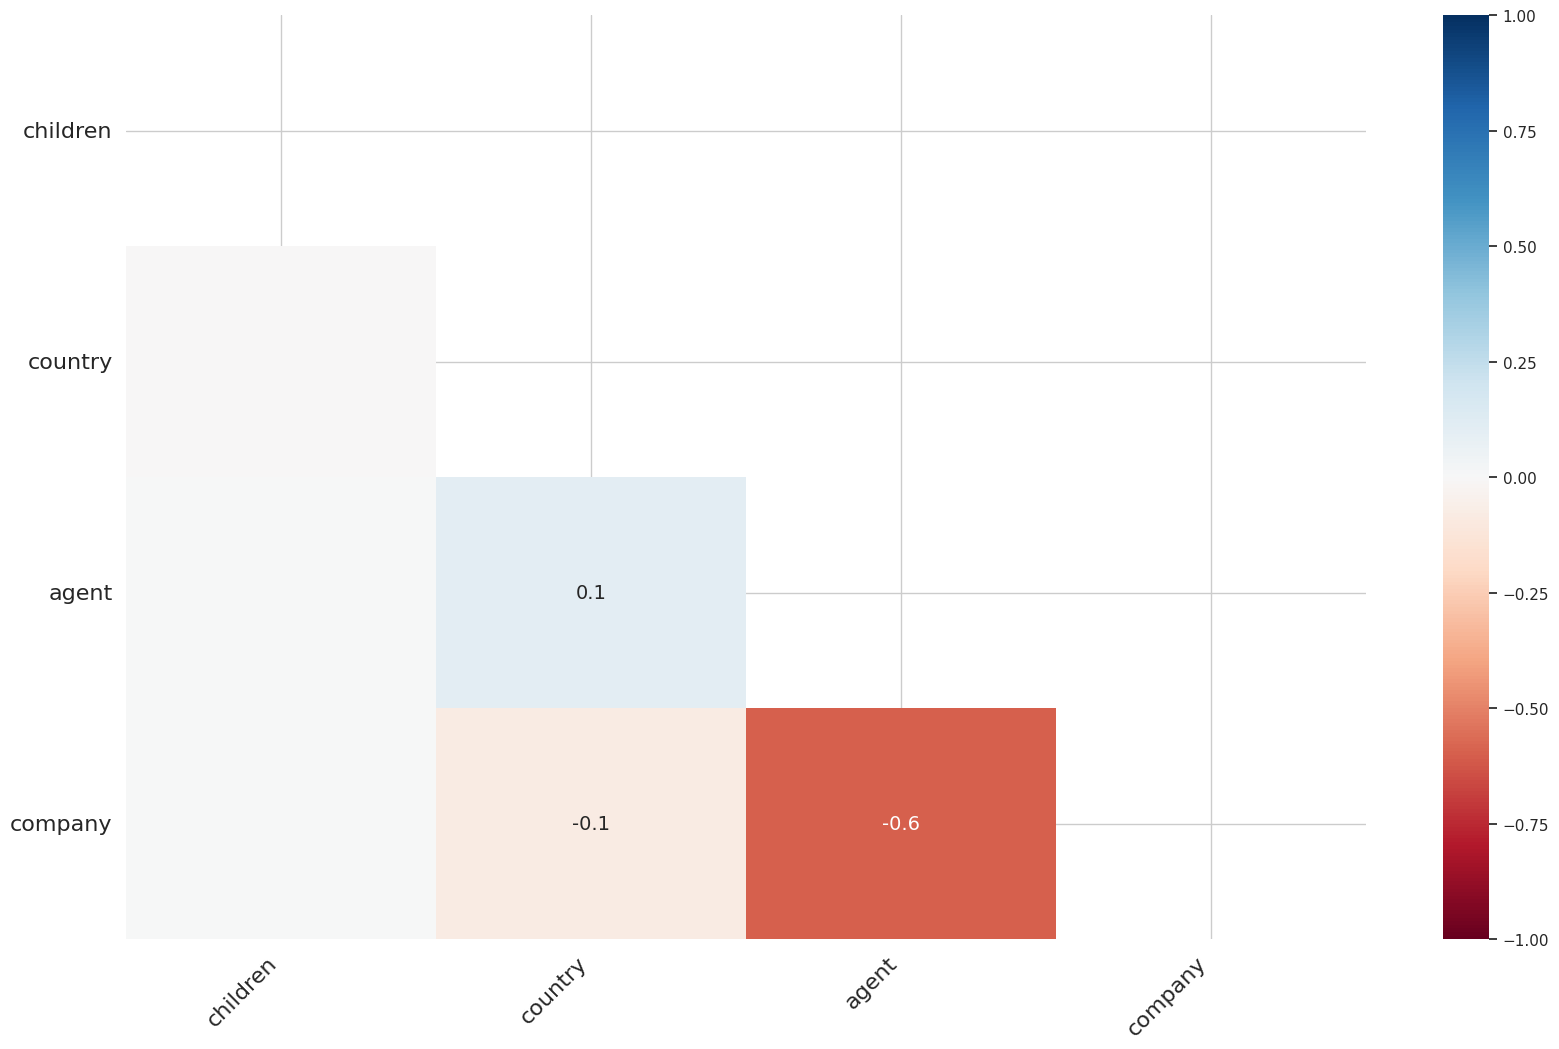

In [50]:
import missingno as msno
msno.heatmap(df)

### Detect Outliers
Use boxplots for 'adr' and 'lead_time'. Also, calculate IQR for outliers.

Text(0.5, 1.0, 'Box plot for Lead Time')

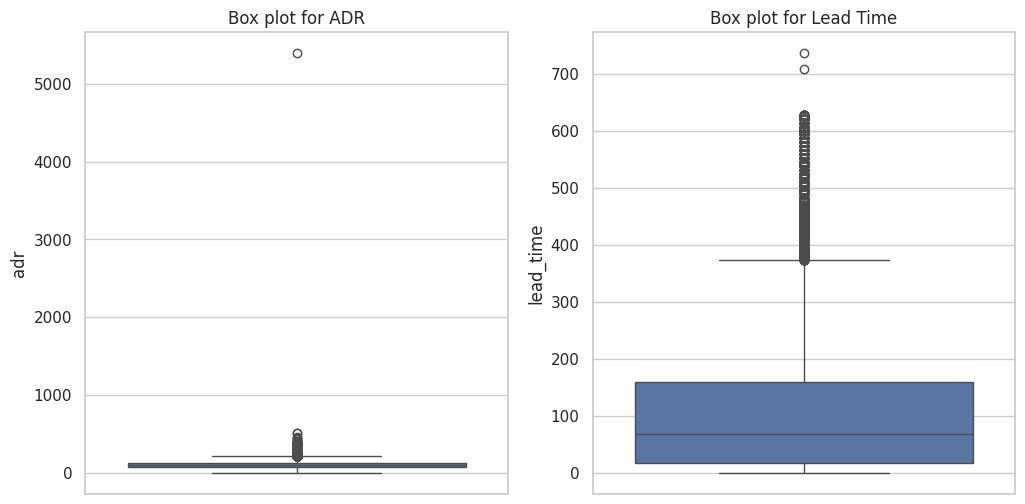

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=df["adr"], ax=axes[0])
axes[0].set_title('Box plot for ADR')
sns.boxplot(y=df["lead_time"], ax=axes[1])
axes[1].set_title("Box plot for Lead Time")

In [52]:
def detect_outliers(col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR
  outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]

  return outliers.shape[0], lower_bound, upper_bound

In [53]:
adr_outliers, adr_lower, adr_upper = detect_outliers("adr")
lead_outliers, lead_lower, lead_upper = detect_outliers("lead_time")

print(f"ADR Outliers: {adr_outliers}, bound: {adr_lower} to {adr_upper}")
print(f"Lead Time Outliers: {lead_outliers}, bound: {lead_lower} to {lead_upper}")

ADR Outliers: 3793, bound: -15.774999999999991 to 211.065
Lead Time Outliers: 3005, bound: -195.0 to 373.0


### Findings: Main Data Quality Issues
- Missing values: High in 'company' (94%), 'agent' (14%), 'country' (0.4%), 'children' (0.003%).
- Outliers: ADR has negative values and extremes (e.g., >1000); Lead Time has long tails.
- Duplicates: Need to check.
- Data types: 'reservation_status_date' should be datetime.
- Other: Potential leakage in 'reservation_status' and 'reservation_status_date'.

## Phase 2: Data Cleaning
Handle missing values, duplicates, outliers, and data types.

In [54]:
# Handling missing values
df["company"].fillna(0, inplace=True)
df["agent"].fillna(0, inplace=True)
df["country"].fillna(df["country"].mode()[0], inplace=True)
df["children"].fillna(df["children"].median(), inplace=True)

# check
df.isnull().sum()

/tmp/ipython-input-244188661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["company"].fillna(0, inplace=True)
/tmp/ipython-input-244188661.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [55]:
# Handling duplicates
dups = df.duplicated().sum()
print(f"Number of duplicated rows: {dups}")

if dups > 0:
  df.drop_duplicates(inplace=True)

Number of duplicated rows: 32013


In [56]:
print(f"Number of duplicates after removal: {df.duplicated().sum()}")

Number of duplicates after removal: 0


In [57]:
df['adr'] = np.where(df['adr'] < 0, 0, df['adr'])
df['adr'] = np.where(df['adr'] > 1000, 1000, df['adr'])

Text(0.5, 1.0, 'Box plot for Lead Time')

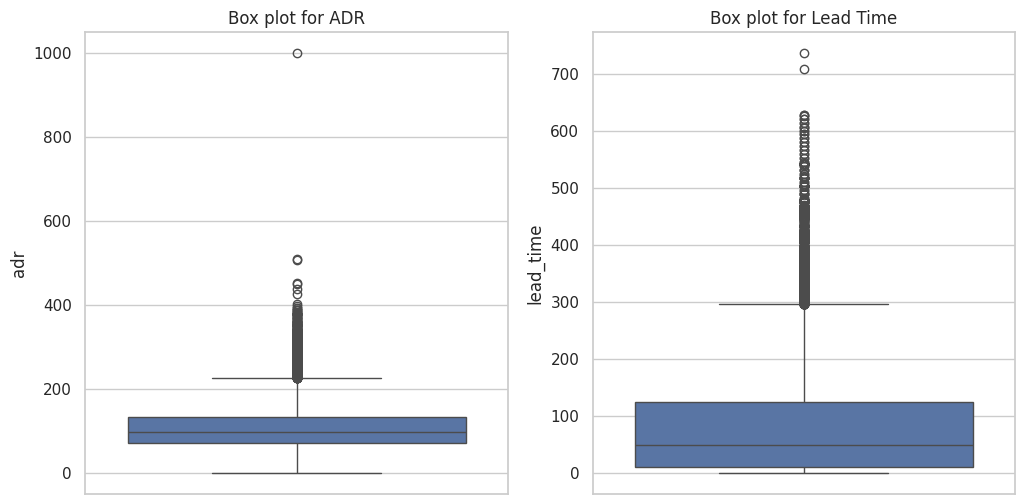

In [58]:
ig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=df["adr"], ax=axes[0])
axes[0].set_title('Box plot for ADR')
sns.boxplot(y=df["lead_time"], ax=axes[1])
axes[1].set_title("Box plot for Lead Time")

In [29]:
# fix reservation_status_date datatype
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87377 non-null  object        
 1   is_canceled                     87377 non-null  int64         
 2   lead_time                       87377 non-null  int64         
 3   arrival_date_year               87377 non-null  int64         
 4   arrival_date_month              87377 non-null  object        
 5   arrival_date_week_number        87377 non-null  int64         
 6   arrival_date_day_of_month       87377 non-null  int64         
 7   stays_in_weekend_nights         87377 non-null  int64         
 8   stays_in_week_nights            87377 non-null  int64         
 9   adults                          87377 non-null  int64         
 10  children                        87377 non-null  float64       
 11  babies

### Cleaning Justification
- Missing values: 'company' and 'agent' as 0 (no ID); 'country' mode (common value); 'children' median (central tendency).
- Duplicates: Dropped to avoid redundancy.
- Outliers: Capped ADR to prevent skew (justified as extreme fares may be errors; real-world cap at 1000 reasonable).
- Data types: Datetime for dates to enable operations.

## Phase 3: Feature Engineering & Preprocessing
Create new features, encode categoricals, remove leakage, and split data.

In [36]:
# creating new features
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["is_family"] = np.where((df["children"] > 0) | (df["babies"] > 0), True, False)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87377 non-null  object        
 1   is_canceled                     87377 non-null  int64         
 2   lead_time                       87377 non-null  int64         
 3   arrival_date_year               87377 non-null  int64         
 4   arrival_date_month              87377 non-null  object        
 5   arrival_date_week_number        87377 non-null  int64         
 6   arrival_date_day_of_month       87377 non-null  int64         
 7   stays_in_weekend_nights         87377 non-null  int64         
 8   stays_in_week_nights            87377 non-null  int64         
 9   adults                          87377 non-null  int64         
 10  children                        87377 non-null  float64       
 11  babies

In [38]:
# Encoding categorical data
low_card = ['meal', 'market_segment']
df_encoded = pd.get_dummies(df, columns=low_card, drop_first=True)

# Frequency encoding for high-cardinality: country
country_freq = df_encoded["country"].value_counts(normalize=True)
df_encoded['country_freq'] = df_encoded['country'].map(country_freq)
df_encoded['country'] = np.where(df_encoded['country_freq'] < 0.01, 'Other', df_encoded['country'])

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,False
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,False
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,False
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,False
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,False


In [39]:
# Remove data leakage
df_encoded.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True)
print(f"Dataset columns after dropping leakage: {df_encoded.columns}")

Dataset columns after dropping leakage: Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_guests', 'total_nights', 'is_family', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined', 'country_freq'],
      dt

### Univariate Analysis
Visualize distributions of individual variables.

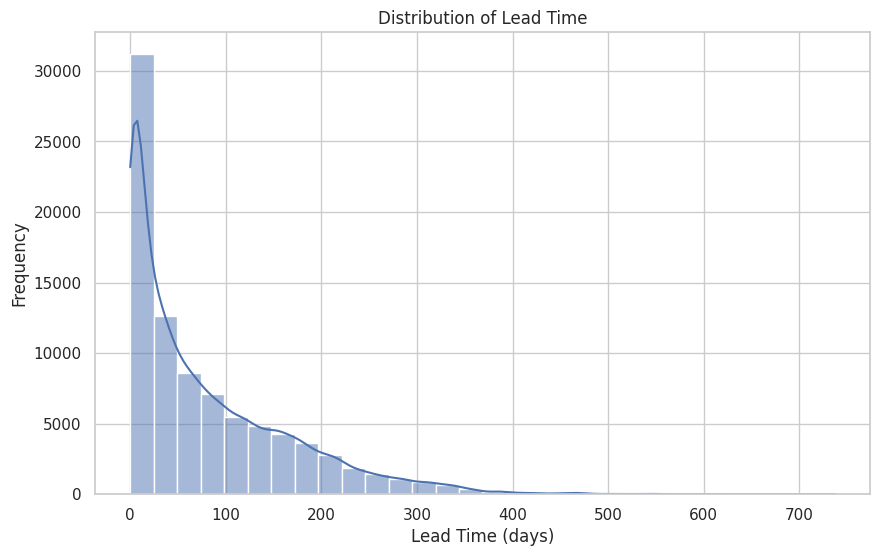

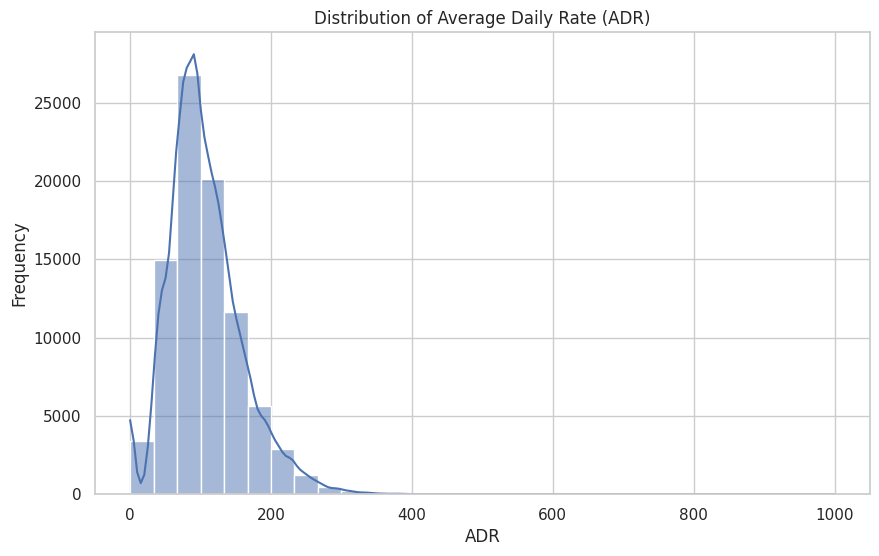

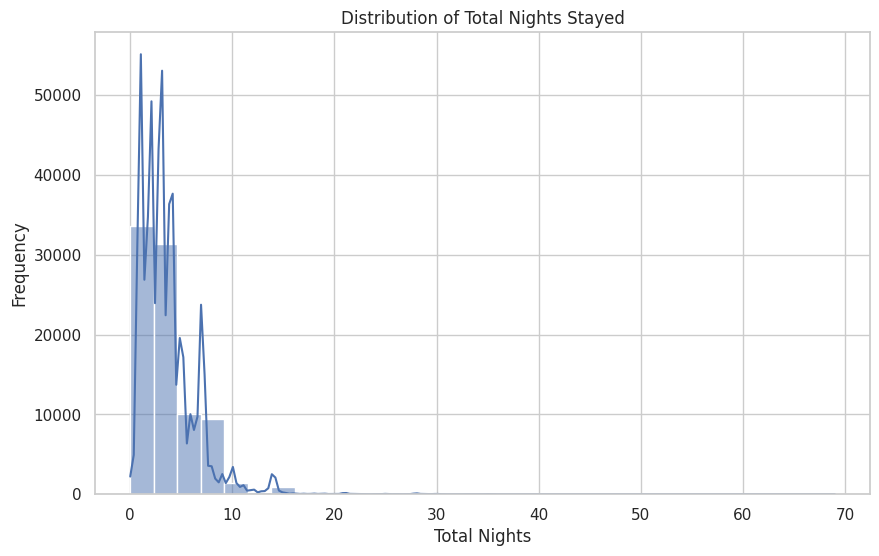

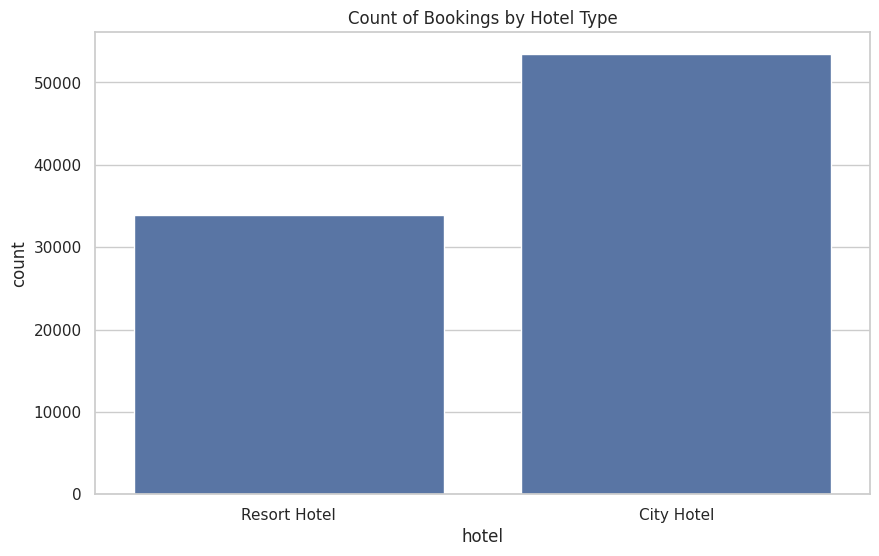

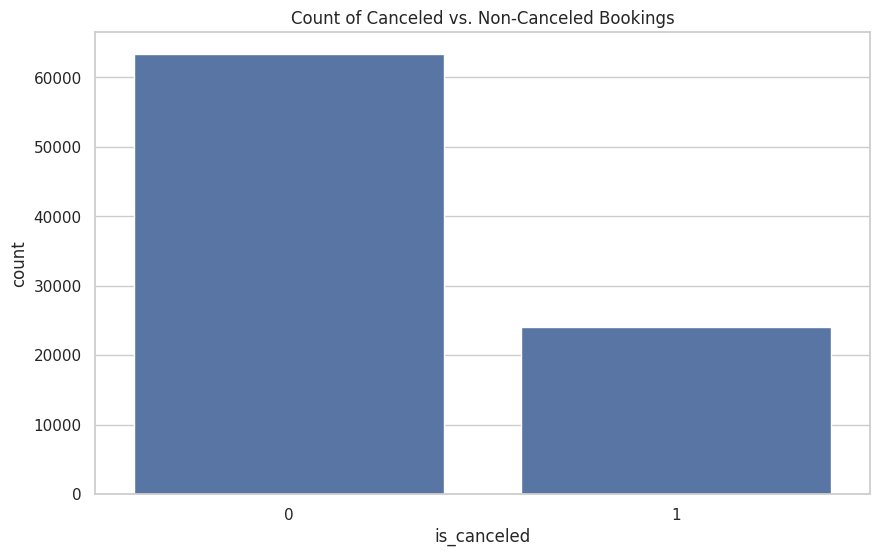

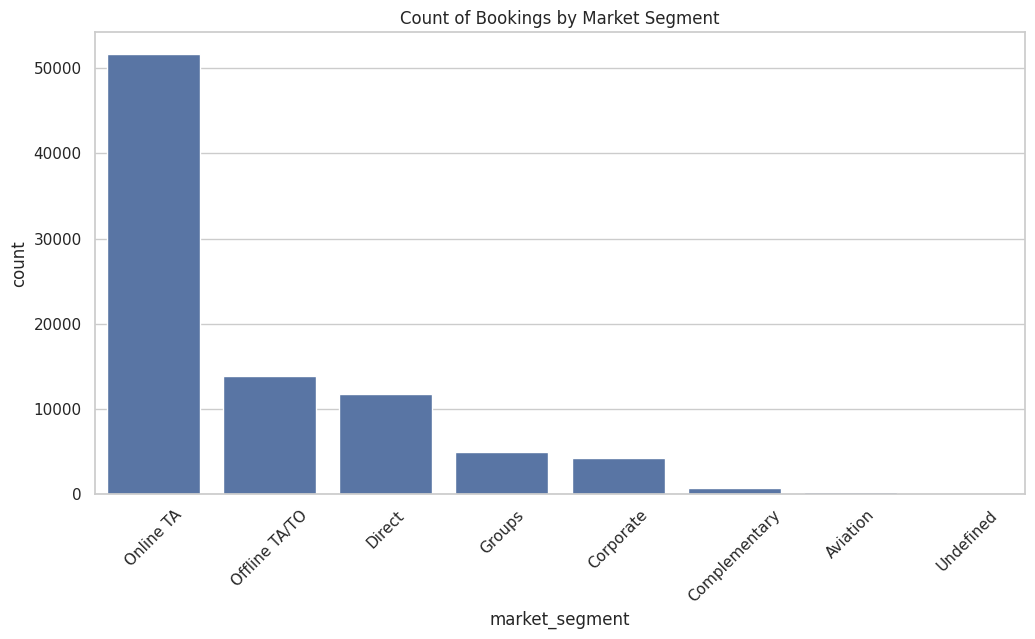

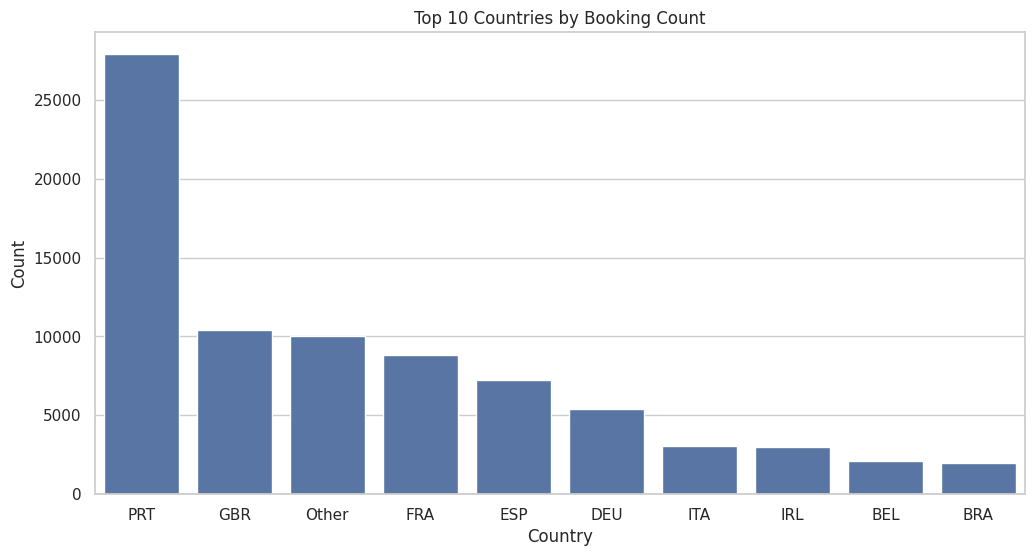

In [68]:
# Cell 5.1: Univariate Analysis - Numerical Variables
# Histogram for lead_time
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['lead_time'], kde=True, bins=30)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for adr
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['adr'], kde=True, bins=30)
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.show()

# Histogram for total stays in nights (computed temporarily for EDA)
df_temp = df_encoded.copy()
df_temp['total_nights'] = df_temp['stays_in_weekend_nights'] + df_temp['stays_in_week_nights']
plt.figure(figsize=(10, 6))
sns.histplot(df_temp['total_nights'], kde=True, bins=30)
plt.title('Distribution of Total Nights Stayed')
plt.xlabel('Total Nights')
plt.ylabel('Frequency')
plt.show()

# Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='hotel', data=df_encoded)
plt.title('Count of Bookings by Hotel Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='is_canceled', data=df_encoded)
plt.title('Count of Canceled vs. Non-Canceled Bookings')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment', data=df, order=df['market_segment'].value_counts().index)
plt.title('Count of Bookings by Market Segment')
plt.xticks(rotation=45)
plt.show()

# Top 10 countries
top_countries = df_encoded['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Booking Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

### Multivariate Analysis
Explore relationships between variables.

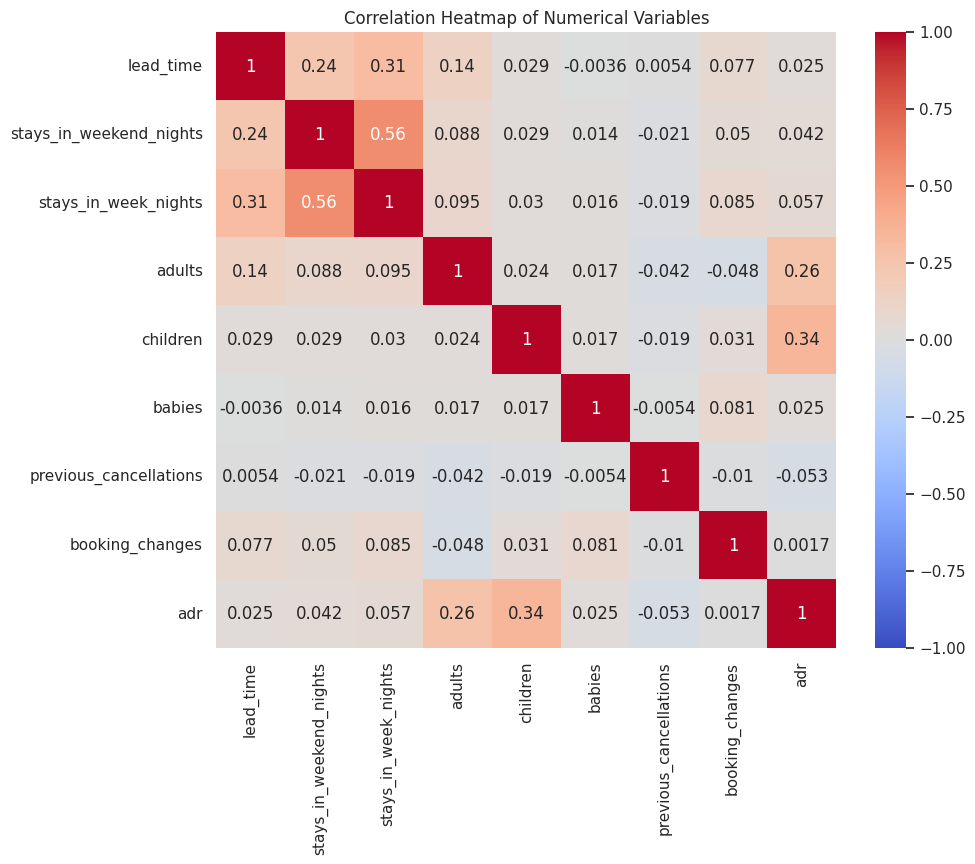

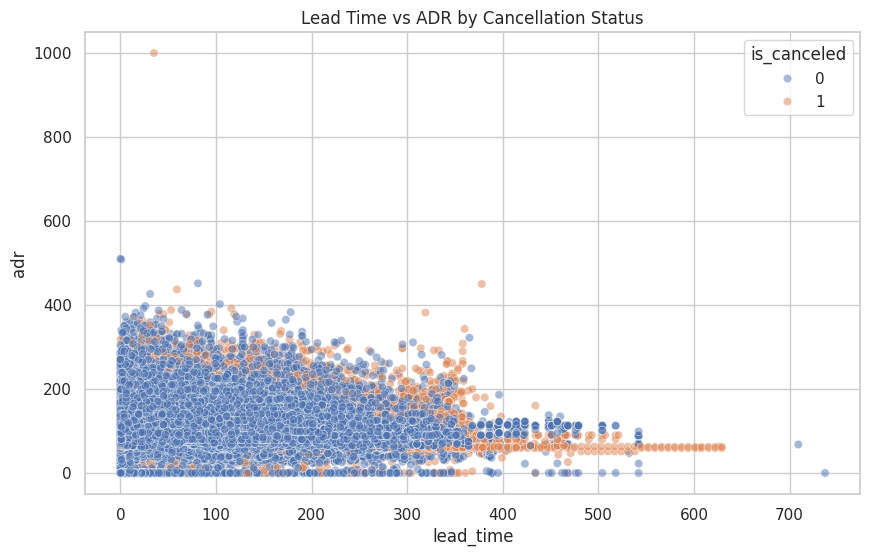

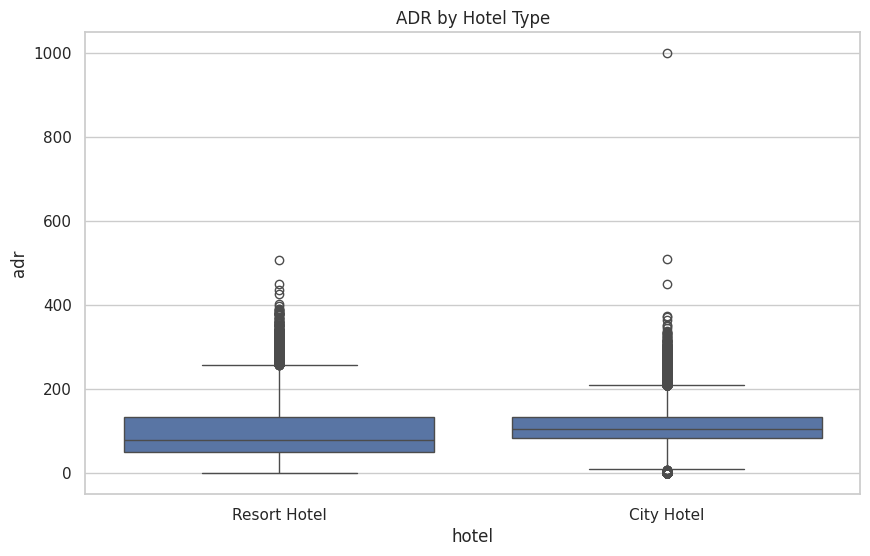

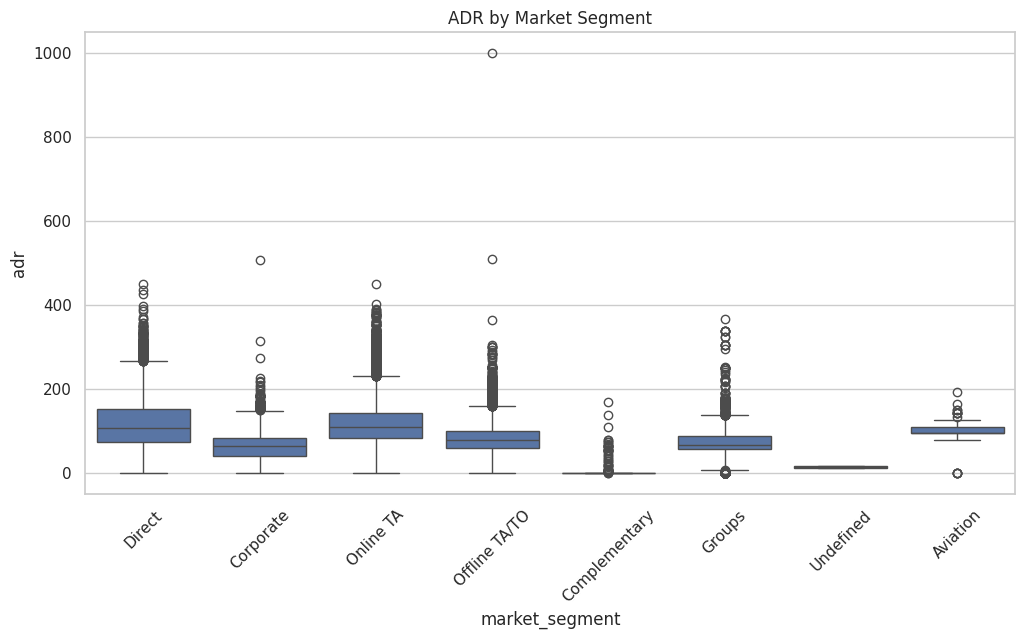

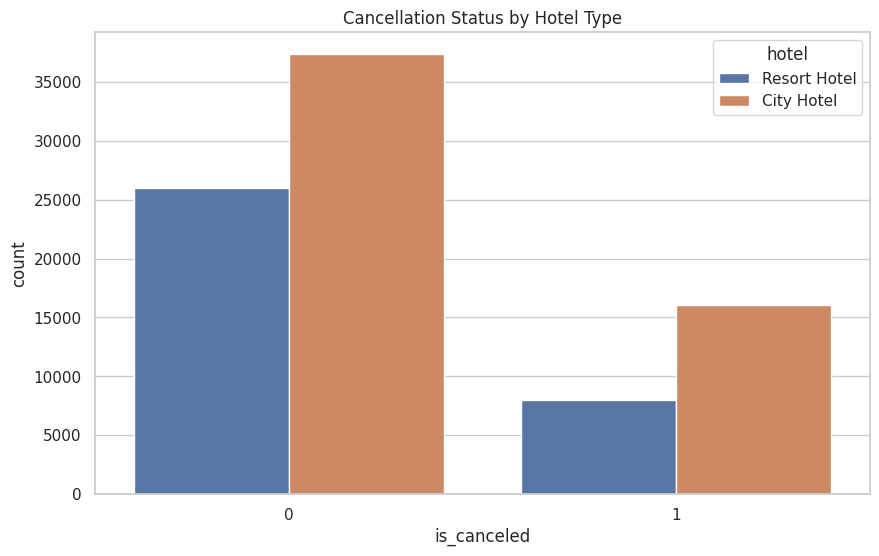

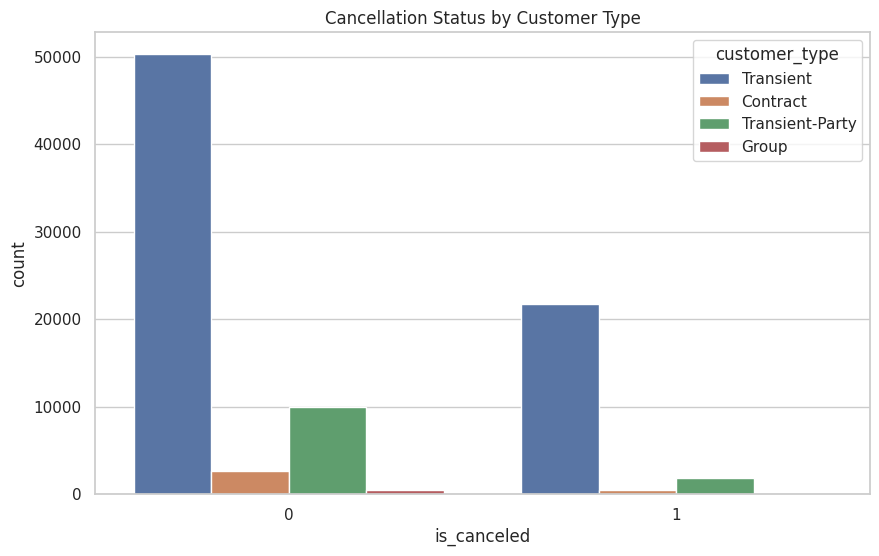

In [ ]:
# Cell 5.2: Multivariate Analysis
# Correlation heatmap for numerical variables
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'booking_changes', 'adr']
corr = df_encoded[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Scatterplot: lead_time vs adr colored by is_canceled
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='adr', hue='is_canceled', data=df_encoded, alpha=0.5)
plt.title('Lead Time vs ADR by Cancellation Status')
plt.show()

# Boxplot: adr by hotel
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='adr', data=df_encoded)
plt.title('ADR by Hotel Type')
plt.show()

# Boxplot: adr by market_segment
plt.figure(figsize=(12, 6))
sns.boxplot(x='market_segment', y='adr', data=df)
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)
plt.show()

# Countplot: is_canceled by hotel
plt.figure(figsize=(10, 6))
sns.countplot(x='is_canceled', hue='hotel', data=df_encoded)
plt.title('Cancellation Status by Hotel Type')
plt.show()

# Countplot: is_canceled by customer_type
plt.figure(figsize=(10, 6))
sns.countplot(x='is_canceled', hue='customer_type', data=df_encoded)
plt.title('Cancellation Status by Customer Type')
plt.show()

# Pairplot for key numerical variables
sns.pairplot(df_encoded[['lead_time', 'adr', 'total_nights', 'is_canceled']], hue='is_canceled')
plt.show()

In [40]:
# data preparation for training - assuming is_calceled is thhe target variable
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (69901, 42)
Testing set: (17476, 42)




### Feature Engineering Notes
- New features: 'total_guests' aggregates people; 'total_nights' total stay; 'is_family' flags family bookings.
- Encoding: One-hot for meal/market_segment (few categories); frequency + grouping for country (high cardinality).
- Leakage: Removed 'reservation_status' and date as they contain post-booking info.
- Split: 80/20 for model training/validation.